<a href="https://colab.research.google.com/github/pa0lai/MachineLearning/blob/main/ML_regressionipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

environment settings

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer


1.


In [ ]:

# step1: 讀取 & 整理資料(選取GDP和percentage expenditure)
from google.colab import files
files.upload_file('abc.csv')
data = pd.read_csv('abc.csv')

#Normalization
x = data.GDP.values.reshape(-1,1)
y = data['percentage expenditure'].values.reshape(-1,1)

#處理NaN
imputer = SimpleImputer(missing_values=np.nan, strategy="median")
imputer = imputer.fit(x)
x = imputer.transform(x)

# step2: 切分 train、test 資料
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.33, random_state= 101)

# step3: 建立 regression
lr = LinearRegression()

# step4: 訓練回歸模型
lr.fit(x_train, y_train)

# step5: 預測測試集資料
lr.predict(x_test)
pred = lr.predict(x_test)

# step6:  計算評估指標
mean_absolute_error(y_test, pred)

Saved Life Expectancy Data.csv to /content/abc.csv


381.6497866876415

使用mean_absolute_error原因:離群值多

2.


Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

polydata = data.copy()

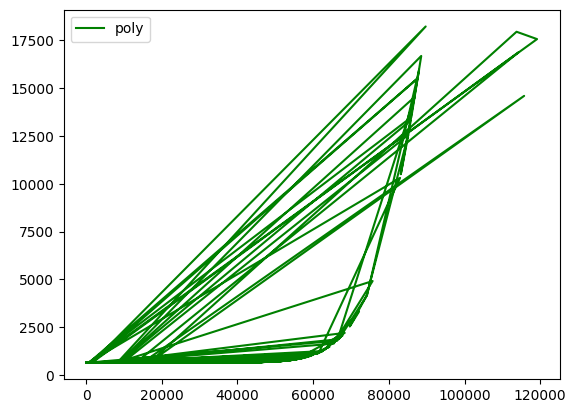

In [ ]:
polynomial_regression = PolynomialFeatures(degree = 15)   #15次
x_polynomial = polynomial_regression.fit_transform(x)  #將原始特征 x 轉換為多項式特征

linear_reg2 = LinearRegression()  #線性回歸
linear_reg2.fit(x_polynomial,y)

y_head = linear_reg2.predict(x_polynomial)  #預測

plt.plot(x,y_head,color="green",label="poly")  #畫圖
plt.legend()
plt.show()

Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DTdata = data.copy()

In [ ]:
DT_reg = DecisionTreeRegressor()     #創建決策樹回歸模型
DT_reg.fit(x_train,y_train)

print(DT_reg.predict([[1000]]))  #預測 x 值為 1000 時的目標變數值(其實看不太懂)

[98.68367951]


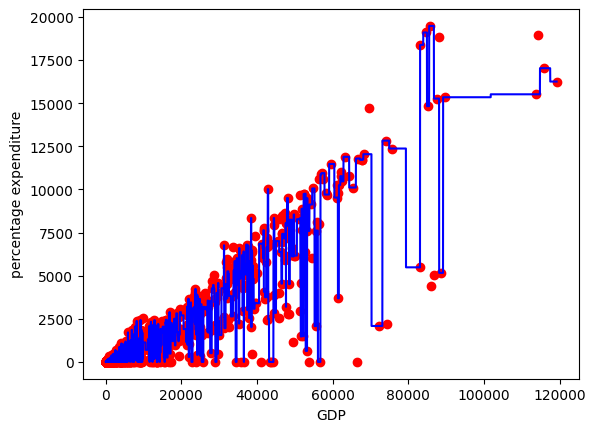

In [ ]:
x_array = np.arange(min(x),max(x),0.01).reshape(-1,1)
y_head = DT_reg.predict(x_array)

plt.scatter(x,y, color="red")
plt.plot(x_array,y_head,color="blue")
plt.xlabel("GDP")
plt.ylabel("percentage expenditure")
plt.show()

Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RFdata = data.copy()



In [ ]:
RF_reg = RandomForestRegressor(n_estimators=100, random_state=42)
RF_reg.fit(x,y)

<ipython-input-35-b1f0dfab6f4c>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_reg.fit(x,y)


RandomForestRegressor(random_state=42)

In [ ]:
print(RF_reg.predict([[1000]]))  #對 x 值為 1000 的情況進行預測

[69.25359462]


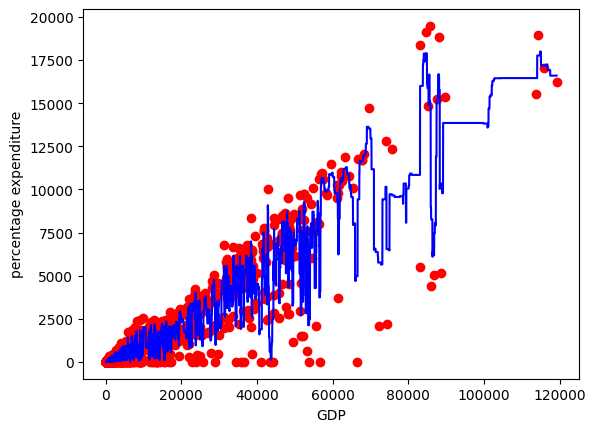

In [ ]:
x_array = np.arange(min(x),max(x),0.01).reshape(-1,1)   #創建一個x_array，包含了在 x 的最小值和最大值之間以 0.01 間隔的數值。產生一個等間隔的 x 值序列。
y_head = RF_reg.predict(x_array)      #生成一個與 x_array 相對應的預測目標變數值

plt.scatter(x,y, color="red")
plt.plot(x_array,y_head,color="blue")
plt.xlabel("GDP")
plt.ylabel("percentage expenditure")
plt.show()

比較：

Polynomial Regression：多決策樹，時間久，組合了多個決策樹可以減小過擬合的風險

Decision Tree Regression：單一決策樹，時間快，處理複雜數據時容易過擬合。

Random Forest Regression：次數不高，快，但次數過大容易過擬合

3.

label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df = data.copy()

df['Country(en)'] = labelencoder.fit_transform(df['Country'])
df[['Country', 'Country(en)']]

,Country,Country(en)
0,Afghanistan,0
1,Afghanistan,0
2,Afghanistan,0
3,Afghanistan,0
4,Afghanistan,0
...,...,...
2933,Zimbabwe,192
2934,Zimbabwe,192
2935,Zimbabwe,192
2936,Zimbabwe,192


one hot encoding


In [ ]:
df = data.copy()
data_dum = pd.get_dummies(df)
data_dum[['Status_Developed',	'Status_Developing']]

,Status_Developed,Status_Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
2933,0,1
2934,0,1
2935,0,1
2936,0,1


Frequency Encoding

In [ ]:
df = data.copy()

cate_cols = ['Country', 'Status']
sampple_nums = df.shape[0]

In [ ]:
# 直接用次數
for col in cate_cols:
     freq_encode_dt = df[col].value_counts().to_dict()
     df[f"{col}(en)"] = df[col].apply(lambda x: freq_encode_dt[x])

df[['Country','Status','Country(en)','Status(en)']]

,Country,Status,Country(en),Status(en)
0,Afghanistan,Developing,16,2426
1,Afghanistan,Developing,16,2426
2,Afghanistan,Developing,16,2426
3,Afghanistan,Developing,16,2426
4,Afghanistan,Developing,16,2426
...,...,...,...,...
2933,Zimbabwe,Developing,16,2426
2934,Zimbabwe,Developing,16,2426
2935,Zimbabwe,Developing,16,2426
2936,Zimbabwe,Developing,16,2426


In [ ]:
# 將次數轉換成比例
for col in cate_cols:
     freq_encode_dt = df[col].value_counts().to_dict()
     df[f"{col}(en)"] = df[col].apply(lambda x: freq_encode_dt[x]/sampple_nums)

df[['Country','Status','Country(en)','Status(en)']]

,Country,Status,Country(en),Status(en)
0,Afghanistan,Developing,0.005446,0.825732
1,Afghanistan,Developing,0.005446,0.825732
2,Afghanistan,Developing,0.005446,0.825732
3,Afghanistan,Developing,0.005446,0.825732
4,Afghanistan,Developing,0.005446,0.825732
...,...,...,...,...
2933,Zimbabwe,Developing,0.005446,0.825732
2934,Zimbabwe,Developing,0.005446,0.825732
2935,Zimbabwe,Developing,0.005446,0.825732
2936,Zimbabwe,Developing,0.005446,0.825732


比較：

label encoding:簡單，但可能產生不必要的數字關係

one hot encoding:可能導致維度過高（這個就是）

Frequency Encoding:不適用於具有相同頻率的類別（這個也是，資料頻率都一樣）



參考資料：https://www.kaggle.com/code/mathchi/life-expectancy-who-with-several-ml-techniques
、助教的範例程式碼